# Task 1

## Feedforward multi-layer networks (multi-layer perceptrons)

### Importing API and libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as im
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from tensorflow import keras
import seaborn as sns
from collections import Counter
from pathlib import Path
print("Keras in standby...")

Keras in standby...


### Reading data:
#### Be mindfull that read_csv reads data depending on where the procject is opened.

In [14]:
from pathlib import Path


In [18]:
# print(Path.home().absolute())
# print(os.path.join((os.path.abspath("")), "Databases/Glass/glass.data"))
pathToFile = Path.cwd().joinpath("Databases/Glass/glass.data")
print("Loading data...")
glassDatabase = pd.read_csv(pathToFile,delim_whitespace=False, header=None, index_col= 0)

print("Data loaded!")
print("Glass database shape: ", glassDatabase.shape)
print("Glass database head:\n", glassDatabase.head())
attrNames = ["RI",
            "NA2O",
            "MGO",
            "AL2O3",
            "SIO2",
            "K2O",
            "CAO",
            "BAO",
            "FE2O3",
            "Class",
            ]


Loading data...
Data loaded!
Glass database shape:  (214, 10)
Glass database head:          1      2     3     4      5     6     7    8    9   10
0                                                             
1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   1
2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   1
3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   1
4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   1
5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   1


In [ ]:

# glassDatabase.reset_index(drop=True, inplace=True)
glassDatabase.columns = attrNames
# print((glassDatabase))
# labels = glassDatabase.iloc[:,-1]
labels = glassDatabase["Class"]
# labels_NORMAL = labels.min()/(labels.max() - labels.min())
glassDatabase_Attributes = glassDatabase.iloc[:,0:-1]
labelsHotOne= keras.utils.to_categorical(labels)
labelsHotOne = pd.DataFrame(data = labelsHotOne)
labelsHotOne = labelsHotOne.iloc[:,1:]
# xTrain, xTest, yTrain, yTest = train_test_split(glassDatabase_Attributes, labels, test_size=0.7, train_size=0.3, shuffle=True)

xTrain, xTest, yTrain, yTest = train_test_split(glassDatabase_Attributes, labelsHotOne, test_size=0.7, train_size=0.3, shuffle=True)


### Checking the data (Classes, how many objects of a class)

Counter yTrain_> Counter({1: 26, 0: 18, 6: 7, 2: 6, 4: 4, 5: 3})
Countery Test_> Counter({0: 52, 1: 50, 6: 22, 2: 11, 4: 9, 5: 6})


[]

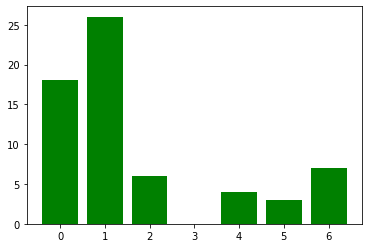

In [3]:

print("Counter yTrain_>",Counter(np.argmax(yTrain.values, axis=-1)))
countYTrain = Counter(np.argmax(yTrain.values, axis=-1))
print("Countery Test_>",Counter(np.argmax(yTest.values, axis=-1)))
countYTest = Counter(np.argmax(yTest.values, axis=-1))
# previewFrameYTrain = pd.DataFrame.from_dict(Counter(np.argmax(yTrain.values, axis=-1)), orient='index')
# previewFrameYTest = pd.DataFrame.from_dict(Counter(np.argmax(yTest.values, axis=-1)), orient='index')
# sns.countplot(x =previewFrameYTrain[0] , data = previewFrameYTrain, order=previewFrameYTrain[0].value_counts().index)
plt.bar(countYTrain.keys(),countYTrain.values(), color='g')
plt.plot()

# sns.barplot(x=, y=, data=previewFrameYTrain)
# sns.barplot(x="Class", y="Class", data=previewFrameYTest)

[]

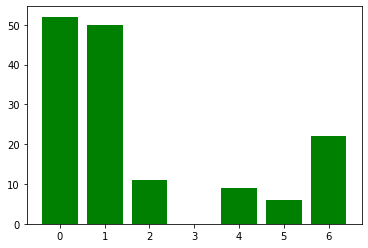

In [4]:
plt.bar(countYTest.keys(),countYTest.values(), color='g')
plt.plot()

### Normalization

In [5]:
scaler= preprocessing.StandardScaler().fit(xTrain)
xTrain_std = scaler.transform(xTrain)
xTest_std = scaler.transform(xTest)

### Creating a model

In [6]:
model = keras.Sequential()
# model.add(keras.layers.Dense(10, activation="sigmoid", input_dim = glassDatabase.shape[1]-1))
model.add(keras.layers.Dense(20, activation="relu"))
# model.add(keras.layers.Dense(10, activation="relu"))
model.add(keras.layers.Dense(7, activation="relu"))
model.add(keras.layers.Dense(14, activation="relu"))
# model.add(keras.layers.Dense(3, activation="relu"))
# model.add(keras.layers.Dense(7, activation="relu"))
model.add(keras.layers.Dense(7, activation="softmax"))
# model.add(keras.layers.Dense(1, activation="softmax"))
# model.add(keras.layers.Dense(1, activation='linear'))
# opt = keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)
opt = keras.optimizers.Adam(learning_rate=0.005, decay=1e-6)
es = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=["accuracy"])
np.random.seed(1)

### Training the network

In [7]:
# history = model.fit(x = xTrain_std , y = yTrain , epochs= 100,batch_size=10, validation_split=0.2, callbacks=[es])
history = model.fit(x = xTrain_std , y = yTrain , epochs= 100,batch_size=10, validation_split=0.2, callbacks=[es])
# print(glassDatabase.iloc[:,:-1])
outputs = model.predict(xTest_std)
outputs = pd.DataFrame(data = outputs)
outputs.rename(columns={0:"Class1", 1:"Class2", 2:"Class3", 3:"Class4", 4:"Class5", 5:"Class6", 6:"Class7"} , inplace=True)
outputsFinalPred = pd.DataFrame(np.where(outputs.T == outputs.T.max(), 1, 0),index=outputs.columns).T

yTest.rename(columns={1:"Class1", 2:"Class2", 3:"Class3", 4:"Class4", 5:"Class5", 6:"Class6", 7:"Class7"} , inplace=True)
model.summary()

Epoch 1/100
6/6 [==============================] - 1s 37ms/step - loss: 1.9513 - accuracy: 0.1373 - val_loss: 1.9670 - val_accuracy: 0.1538
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 1.8145 - accuracy: 0.4118 - val_loss: 1.8792 - val_accuracy: 0.2308
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 1.7127 - accuracy: 0.4510 - val_loss: 1.7728 - val_accuracy: 0.1538
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 1.6133 - accuracy: 0.4706 - val_loss: 1.6698 - val_accuracy: 0.1538
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 1.5077 - accuracy: 0.4706 - val_loss: 1.5618 - val_accuracy: 0.2308
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 1.4008 - accuracy: 0.4902 - val_loss: 1.4420 - val_accuracy: 0.3077
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 1.2980 - accuracy: 0.5294 - val_loss: 1.3080 - val_accuracy: 0.3846
Epoch 8/100
6/6 [=========

In [8]:
classes_pred = model.predict(xTest_std)
classes_pred = classes_pred.argmax(axis=1)

print("Classes_prediction_>\n",classes_pred[50:100])
print("Classes test results_>\n",(yTest.values.argmax(axis=1))[50:100])

Classes_prediction_>
 [1 1 5 1 0 1 0 6 1 6 0 1 1 1 0 0 0 0 0 0 1 0 0 1 6 1 1 0 1 0 6 0 0 1 6 1 4
 0 0 1 6 1 1 0 1 1 1 6 1 0]
Classes test results_>
 [1 6 5 1 0 4 1 6 2 6 0 1 1 0 0 0 1 0 1 0 0 2 0 1 6 1 1 0 1 0 6 1 1 1 6 2 6
 0 0 0 6 0 1 1 1 5 1 6 1 0]


### Plotting the results. (Heatmap/confusion matrix)

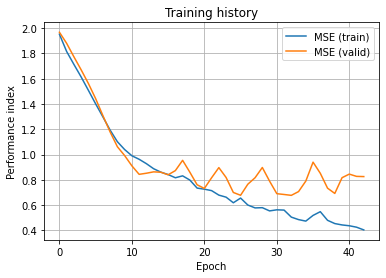

Confusion matrix_>
 [[39 13  0  0  0  0]
 [13 34  0  3  0  0]
 [ 7  4  0  0  0  0]
 [ 0  3  0  5  0  1]
 [ 0  2  0  1  2  1]
 [ 0  3  0  1  0 18]]
Correct predictions are _>



<AxesSubplot:>

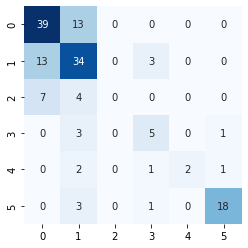

In [9]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training history')
plt.ylabel('Performance index')
plt.xlabel('Epoch')
plt.legend(['MSE (train)', 'MSE (valid)'], loc='upper right')
plt.grid()
plt.show()

matrix_confusion = confusion_matrix(
    yTest.values.argmax(axis=1), outputsFinalPred.values.argmax(axis=1))
print("Confusion matrix_>\n",matrix_confusion)
print("Correct predictions are _>\n")
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
# df_confusion = pd.crosstab(yTest, outputsFinalPred, rownames=['Actual'], colnames=['Predicted'], margins=True)
